<a href="https://colab.research.google.com/github/psaw/hse-ai24-ml/blob/main/KNN_demo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Метод ближайших соседей

## Импорт библиотек, установка константных значений

In [ ]:
import numpy as np
import pandas as pd
import sklearn

from sklearn.datasets import load_digits
from sklearn.neighbors import KNeighborsClassifier
from sklearn.utils import shuffle

from matplotlib import pyplot as plt

In [ ]:
RANDOM_STATE = 42
TRAIN_SIZE = 0.7

## Практика

Применим KNN к датасету с изображениями цифр. Это данные для 10-классовой классификации.

Загрузим данные и посмотрим на них.

In [ ]:
data = load_digits()
X = data.images
y = data.target

X.shape

(1797, 8, 8)

In [ ]:
X[0]

array([[ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.],
       [ 0.,  0., 13., 15., 10., 15.,  5.,  0.],
       [ 0.,  3., 15.,  2.,  0., 11.,  8.,  0.],
       [ 0.,  4., 12.,  0.,  0.,  8.,  8.,  0.],
       [ 0.,  5.,  8.,  0.,  0.,  9.,  8.,  0.],
       [ 0.,  4., 11.,  0.,  1., 12.,  7.,  0.],
       [ 0.,  2., 14.,  5., 10., 12.,  0.,  0.],
       [ 0.,  0.,  6., 13., 10.,  0.,  0.,  0.]])

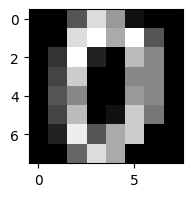

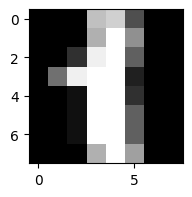

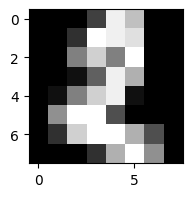

In [ ]:
for i in range(3):
  plt.figure(figsize=(2,2))
  plt.imshow(X[i], cmap='gray')
  plt.show()

Каждая картинка - это матрица чисел (яркостей пикселей). Но в стандартной постановке задач каждый объект (картинка) - это строчка своих признаков в матрице объект-признак. Поэтому вытянем каждую картинку в вектор.

In [ ]:
X = X.reshape(X.shape[0], -1)

X.shape

(1797, 64)

Перемешаем данные, так как в исходном датасете числа идут друг за другом, а нам для обучения и тестирования модели нужен случайный порядок.

In [ ]:
X, y = shuffle(X, y)

print(f"Features shape: {X.shape},\nTarget shape: {y.shape}")
print(f"Target samples: {y[:10]}")

Features shape: (1797, 64),
Target shape: (1797,)
Target samples: [6 9 4 2 3 7 1 3 0 7]


Разобъем данные на трейн и тест.

In [ ]:
from sklearn.model_selection import train_test_split

Xtrain, Xtest, ytrain, ytest = train_test_split(X, y,
                                                train_size=TRAIN_SIZE,
                                                random_state=RANDOM_STATE)

Обучим KNN с взятым из головы числом соседей (10).

In [ ]:
clf = KNeighborsClassifier(n_neighbors=10)

clf.fit(Xtrain, ytrain)
prediction = clf.predict(Xtest)

In [ ]:
from sklearn.metrics import accuracy_score

accuracy_score(ytest, prediction)

0.9907407407407407

Посмотрим, как число соседей влияет на качество модели.

In [ ]:
for k in np.arange(3, 50, 2):
    clf = KNeighborsClassifier(n_neighbors=k)

    clf.fit(Xtrain, ytrain)
    prediction = clf.predict(Xtest)

    print('k:', k)
    print('accuracy:', accuracy_score(ytest, prediction))

k: 3
accuracy: 0.9925925925925926
k: 5
accuracy: 0.9925925925925926
k: 7
accuracy: 0.9851851851851852
k: 9
accuracy: 0.9907407407407407
k: 11
accuracy: 0.9888888888888889
k: 13
accuracy: 0.9796296296296296
k: 15
accuracy: 0.975925925925926
k: 17
accuracy: 0.9796296296296296
k: 19
accuracy: 0.9722222222222222
k: 21
accuracy: 0.9722222222222222
k: 23
accuracy: 0.9740740740740741
k: 25
accuracy: 0.9740740740740741
k: 27
accuracy: 0.9722222222222222
k: 29
accuracy: 0.9685185185185186
k: 31
accuracy: 0.9722222222222222
k: 33
accuracy: 0.9722222222222222
k: 35
accuracy: 0.9685185185185186
k: 37
accuracy: 0.9666666666666667
k: 39
accuracy: 0.9648148148148148
k: 41
accuracy: 0.9666666666666667
k: 43
accuracy: 0.9666666666666667
k: 45
accuracy: 0.9648148148148148
k: 47
accuracy: 0.9629629629629629
k: 49
accuracy: 0.9611111111111111


Посмотрим, как влияет на качество алгоритма способ учесть веса у ближайших соседей.

In [ ]:
for weights in ['uniform', 'distance']:
    clf = KNeighborsClassifier(n_neighbors=3, weights=weights)

    clf.fit(Xtrain, ytrain)
    prediction = clf.predict(Xtest)

    print('weights:', weights)
    print('accuracy:', accuracy_score(ytest, prediction))

weights: uniform
accuracy: 0.9925925925925926
weights: distance
accuracy: 0.9925925925925926


Визуально оценим качество предсказаний

predicted label: 5


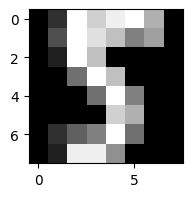

predicted label: 6


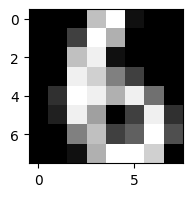

predicted label: 2


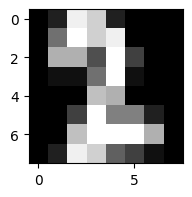

predicted label: 0


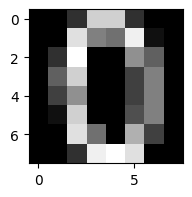

predicted label: 0


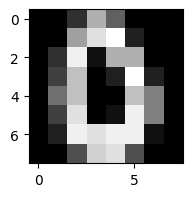

In [ ]:
for i in range(5):
  print('predicted label:', prediction[i])
  plt.figure(figsize=(2,2))
  plt.imshow(Xtest[i].reshape((8,8)), cmap='gray')
  plt.show()

Мы видим, что KNN довольно хорошо справился с задачей!  
Подбор гиперпараметров (число соседей, способ подсчета весов соседей и другие) также влияет на качество предсказания модели.

true label: 3
predicted label: 9


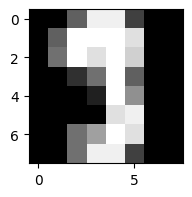

true label: 5
predicted label: 9


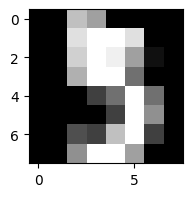

true label: 4
predicted label: 7


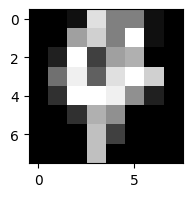

true label: 9
predicted label: 4


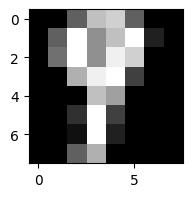

In [ ]:
for i in range(len(ytest)):
   if ytest[i] != prediction[i]:
      print('true label:', ytest[i])
      print('predicted label:', prediction[i])
      plt.figure(figsize=(2,2))
      plt.imshow(Xtest[i].reshape((8,8)), cmap='gray')
      plt.show()